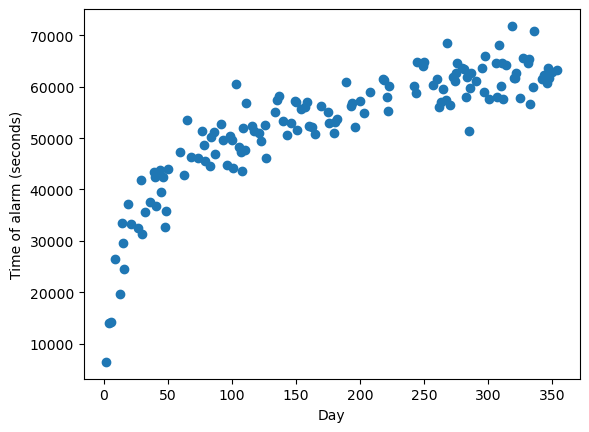

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import data.csv
data = pd.read_csv('data.csv')

# First column is day, second is the time of the alarm in (%H:%M:%S)
# Convert the time to seconds
time = data['alarm (%H:%M:%S)']
time = np.array([int(t.split(':')[0])*3600 + int(t.split(':')[1])*60 + int(t.split(':')[2]) for t in time])

# Plot the data
plt.plot(data['day'], time, 'o')
plt.xlabel('Day')
plt.ylabel('Time of alarm (seconds)')
plt.show()

The predicted time of the alarm on day 356 is 19:3:29


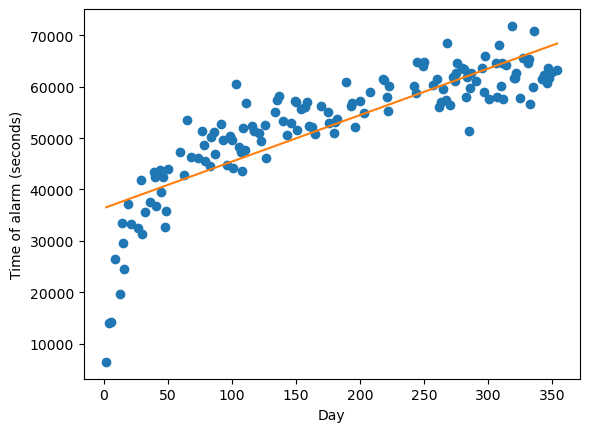

In [5]:
# predict the time of the alarm on day 356, using linear regression
# create the design matrix
X = np.c_[np.ones(len(data['day'])), data['day']]
# calculate the coefficients
beta = np.linalg.inv(X.T @ X) @ X.T @ time
# predict the time of the alarm on day 356
time_pred = beta[0] + beta[1]*356
# Convert it to hours, minutes and seconds
hours = time_pred // 3600
minutes = (time_pred % 3600) // 60
seconds = time_pred % 60
print(f'The predicted time of the alarm on day 356 is {int(hours)}:{int(minutes)}:{int(seconds)}')

# plot the data and the linear regression line
plt.plot(data['day'], time, 'o')
plt.plot(data['day'], beta[0] + beta[1]*data['day'])
plt.xlabel('Day')
plt.ylabel('Time of alarm (seconds)')
plt.show()

The predicted time of the alarm on day 356 is 20:24:16


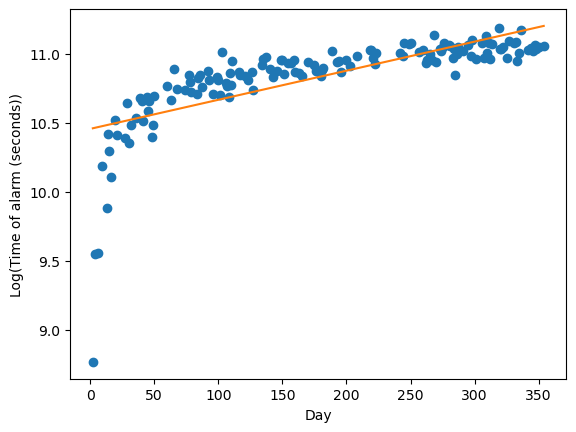

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import data.csv
data = pd.read_csv('data.csv')

# Convert the time to seconds
time = data['alarm (%H:%M:%S)']
time = np.array([int(t.split(':')[0])*3600 + int(t.split(':')[1])*60 + int(t.split(':')[2]) for t in time])

# Transform the time into log space
log_time = np.log(time)

# Create the design matrix
X = np.c_[np.ones(len(data['day'])), data['day']]

# Calculate the coefficients
beta = np.linalg.inv(X.T @ X) @ X.T @ log_time

# Predict the time of the alarm on day 356 in log space
log_time_pred = beta[0] + beta[1] * 356

# Convert the predicted log time back to seconds
time_pred = np.exp(log_time_pred)

# Convert it to hours, minutes and seconds
hours = time_pred // 3600
minutes = (time_pred % 3600) // 60
seconds = time_pred % 60
print(f'The predicted time of the alarm on day 356 is {int(hours)}:{int(minutes)}:{int(seconds)}')

# Plot the data and the linear regression line in log space
plt.plot(data['day'], log_time, 'o')
plt.plot(data['day'], beta[0] + beta[1] * data['day'])
plt.xlabel('Day')
plt.ylabel('Log(Time of alarm (seconds))')
plt.show()